# Question 1: Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

## Import libraries and dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

NY311_df = pd.read_csv("311_Service_Requests_from_2010_to_Present_min.csv")
NY311_df.drop("Unnamed: 0", axis=1, inplace=True)
NY311_df.set_index("Unique Key", inplace=True)
NY311_df.sort_index(inplace=True)

In [4]:
NY311_df.head()

,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
Unique Key,,,,,,,,,,,,,,
15629728,01/01/2010 12:00:00 AM,01/12/2010 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,11210.0,3101 FOSTER AVENUE,FOSTER AVENUE,ADDRESS,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.638696,-73.946969
15629899,01/01/2010 12:00:00 AM,01/16/2010 12:00:00 AM,PLUMBING,RESIDENTIAL BUILDING,11106.0,31-54 29 STREET,29 STREET,ADDRESS,ASTORIA,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.764035,-73.925935
15630099,01/01/2010 12:00:00 AM,01/01/2010 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,10466.0,1405 EAST 233 STREET,EAST 233 STREET,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.888997,-73.836192
15630315,01/01/2010 12:00:00 AM,01/16/2010 12:00:00 AM,PLUMBING,RESIDENTIAL BUILDING,11106.0,31-54 29 STREET,29 STREET,ADDRESS,ASTORIA,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.764035,-73.925935
15630431,01/01/2010 12:00:00 AM,01/02/2010 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,11226.0,22 MARTENSE STREET,MARTENSE STREET,ADDRESS,BROOKLYN,Closed,More than one complaint was received for this ...,Unspecified,40.651236,-73.958293


## Light data exploration

In [3]:
# Check number of rows (number of complaints) and columns
print(NY311_df.shape)
print("Number of complaints:", NY311_df.shape[0])

(6019843, 15)
Number of complaints: 6019843


In [4]:
# what information do we have
NY311_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Complaint Type',
       'Location Type', 'Incident Zip', 'Incident Address', 'Street Name',
       'Address Type', 'City', 'Status', 'Resolution Description', 'Borough',
       'Latitude', 'Longitude'],
      dtype='object')

In [5]:
# make sure the datatypes seem reasonable
NY311_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unique Key              int64  
 1   Created Date            object 
 2   Closed Date             object 
 3   Complaint Type          object 
 4   Location Type           object 
 5   Incident Zip            float64
 6   Incident Address        object 
 7   Street Name             object 
 8   Address Type            object 
 9   City                    object 
 10  Status                  object 
 11  Resolution Description  object 
 12  Borough                 object 
 13  Latitude                float64
 14  Longitude               float64
dtypes: float64(3), int64(1), object(11)
memory usage: 688.9+ MB


It seems as though most of the columns have the proper data type with 3 float64, 1 int64, and 11 object types. The created date and closed dates are object types. I would prefer if this was in date time form.

In [6]:
# Convert the created and closed date into datetime type
NY311_df["Created Date"] = pd.to_datetime(NY311_df["Created Date"], format="%m/%d/%Y %I:%M:%S %p")
NY311_df["Closed Date"] = pd.to_datetime(NY311_df["Closed Date"], format="%m/%d/%Y %I:%M:%S %p")
NY311_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 15 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Unique Key              int64         
 1   Created Date            datetime64[ns]
 2   Closed Date             datetime64[ns]
 3   Complaint Type          object        
 4   Location Type           object        
 5   Incident Zip            float64       
 6   Incident Address        object        
 7   Street Name             object        
 8   Address Type            object        
 9   City                    object        
 10  Status                  object        
 11  Resolution Description  object        
 12  Borough                 object        
 13  Latitude                float64       
 14  Longitude               float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(9)
memory usage: 688.9+ MB


Now the datatypes seem correct: 2 datetime, 3 float64 types, 1 int64 type, 9 object type.

In [7]:
# Have a look at the number of complaint types
print(NY311_df["Complaint Type"].value_counts())
print("There seem to be", NY311_df["Complaint Type"].value_counts().count(), "complaint types")

HEAT/HOT WATER            1261574
HEATING                    887850
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
Outside Building                6
VACANT APARTMENT                6
Appliance                       4
Mold                            1
Electric      

It seems as though there are 30 complaint types however, there seem to be duplicates/incorrect complaint types due to inconsistent capitalisation and formatting.

## Data cleaning

In [8]:
# Remove complaint type duplicates due to capitalisation
NY311_df["Complaint Type"] = NY311_df["Complaint Type"].str.upper()
NY311_df["Complaint Type"].unique()

array(['HEAT/HOT WATER', 'UNSANITARY CONDITION', 'APPLIANCE', 'GENERAL',
       'ELECTRIC', 'PLUMBING', 'PAINT/PLASTER', 'WATER LEAK', 'SAFETY',
       'DOOR/WINDOW', 'OUTSIDE BUILDING', 'ELEVATOR', 'FLOORING/STAIRS',
       'HPD LITERATURE REQUEST', 'HEATING', 'PAINT - PLASTER',
       'GENERAL CONSTRUCTION', 'NONCONST', 'CONSTRUCTION', 'AGENCY',
       'STRUCTURAL', 'VACANT APARTMENT', 'MOLD'], dtype=object)

It seems as though we still have a few duplicate categories of complaint types that need to be merged together. These seem to be:
- HEAT/HOT WATER and HEATING
- CONSTRUCTION and GENERAL CONSTRUCTION
- PAINT - PLASTER and PAINT/PLASTER

### Merge duplicate complaint type categories

In [9]:
replace_categories = {"HEAT/HOT WATER": "HEATING", 
                      "CONSTRUCTION": "GENERAL CONSTRUCTION",
                      "PAINT - PLASTER" : "PAINT/PLASTER"             
                     } 
NY311_df["Complaint Type"] = NY311_df["Complaint Type"].replace(replace_categories)
NY311_df["Complaint Type"].unique()

array(['HEATING', 'UNSANITARY CONDITION', 'APPLIANCE', 'GENERAL',
       'ELECTRIC', 'PLUMBING', 'PAINT/PLASTER', 'WATER LEAK', 'SAFETY',
       'DOOR/WINDOW', 'OUTSIDE BUILDING', 'ELEVATOR', 'FLOORING/STAIRS',
       'HPD LITERATURE REQUEST', 'GENERAL CONSTRUCTION', 'NONCONST',
       'AGENCY', 'STRUCTURAL', 'VACANT APARTMENT', 'MOLD'], dtype=object)

Let's check how many complaint types we have and how many of each type we have

In [10]:
print("There are now", NY311_df["Complaint Type"].value_counts().count(), "complaint types.")

There are now 20 complaint types.


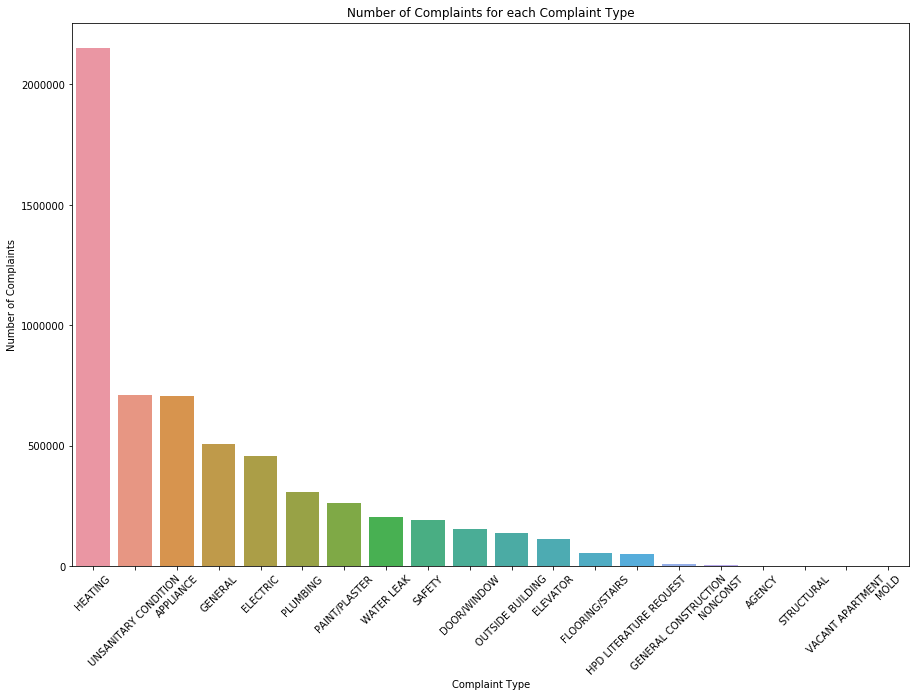

In [11]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=NY311_df["Complaint Type"].unique(), y=NY311_df["Complaint Type"].value_counts())
ax.set(xlabel="Complaint Type", ylabel="Number of Complaints")
ax.set_title("Number of Complaints for each Complaint Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [12]:
# Using 800,000 as the threshold, what complaint type(s) do you recommend the Department of Housing Preservation and Development of New York City address first?\
NY311_df["Complaint Type"].value_counts() >= 800000

HEATING                    True
PLUMBING                  False
PAINT/PLASTER             False
GENERAL CONSTRUCTION      False
UNSANITARY CONDITION      False
ELECTRIC                  False
NONCONST                  False
DOOR/WINDOW               False
WATER LEAK                False
GENERAL                   False
FLOORING/STAIRS           False
APPLIANCE                 False
HPD LITERATURE REQUEST    False
SAFETY                    False
OUTSIDE BUILDING          False
ELEVATOR                  False
STRUCTURAL                False
AGENCY                    False
VACANT APARTMENT          False
MOLD                      False
Name: Complaint Type, dtype: bool

## Conclusion
Question to answer: Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

Using 800,000 as the threshold of complaints, I would recommend the Department of Housing Preservation and Development of New York City to focus on fixing the **heating** problem of buildings.   

### Save dataframe

In [13]:
NY311_df.to_csv('NY311_df_clean')